# Random Forest - Classification Model
***Predicting if home price is going to be driven up or down (high/low) based on other factors.***

#### Note - the house supply is the ratio of houses for sale to houses sold.

In [1]:
from sklearn import tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the csv file into a pandas DataFrame and filter by date

housing_data = pd.read_csv('etl/housing_combined_data.csv')
housing_data_subset = housing_data.loc[(housing_data["date"] >= "1990-01-01")
                     & (housing_data["date"] < "2021-01-01")]
housing_data_subset

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,1990-01-01,10.13,1426,123900.0,64.1,55.58,7.0,1441,116.47,891,1402
1,1990-04-01,10.32,1212,126800.0,63.9,56.64,8.0,1104,117.47,859,1315
2,1990-07-01,10.10,1132,117000.0,63.9,54.72,8.0,1041,117.87,812,1305
3,1990-10-01,9.96,1043,121500.0,64.0,51.38,8.0,909,117.07,756,1234
4,1991-01-01,9.50,895,120000.0,64.0,51.48,8.0,850,116.47,701,1138
...,...,...,...,...,...,...,...,...,...,...,...
119,2019-10-01,3.70,1405,327100.0,65.0,96.33,5.0,1490,206.27,1168,1280
120,2020-01-01,3.52,1485,329000.0,65.3,101.60,6.0,1470,210.60,1209,1283
121,2020-04-01,3.24,1086,322600.0,68.1,100.00,5.0,1212,203.90,1187,1204
122,2020-07-01,2.95,1440,337500.0,67.3,145.00,4.0,1551,202.17,1210,1327


In [3]:
# Drop the date column
housing_data_subset = housing_data_subset.drop(["date"], axis=1)
housing_data_subset

,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,10.13,1426,123900.0,64.1,55.58,7.0,1441,116.47,891,1402
1,10.32,1212,126800.0,63.9,56.64,8.0,1104,117.47,859,1315
2,10.10,1132,117000.0,63.9,54.72,8.0,1041,117.87,812,1305
3,9.96,1043,121500.0,64.0,51.38,8.0,909,117.07,756,1234
4,9.50,895,120000.0,64.0,51.48,8.0,850,116.47,701,1138
...,...,...,...,...,...,...,...,...,...,...
119,3.70,1405,327100.0,65.0,96.33,5.0,1490,206.27,1168,1280
120,3.52,1485,329000.0,65.3,101.60,6.0,1470,210.60,1209,1283
121,3.24,1086,322600.0,68.1,100.00,5.0,1212,203.90,1187,1204
122,2.95,1440,337500.0,67.3,145.00,4.0,1551,202.17,1210,1327


In [4]:
# Find median interest rate
median_int_rate = housing_data_subset["avg_home_price"].median()
median_int_rate

219250.0

In [5]:
# Average home price outcome column

# create a list of our conditions
conditions = [
    (housing_data_subset["avg_home_price"] >= 219250.0),
    (housing_data_subset["avg_home_price"] < 219250.0)
    ]

# create a list of the values we want to assign for each condition
outcomes = ["high", "low"]

# create a new column and use np.select to assign outcomes to it using our lists as arguments

housing_data_subset["avg_home_outcome"] = np.select(conditions, outcomes)
housing_data_subset

,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed,avg_home_outcome
0,10.13,1426,123900.0,64.1,55.58,7.0,1441,116.47,891,1402,low
1,10.32,1212,126800.0,63.9,56.64,8.0,1104,117.47,859,1315,low
2,10.10,1132,117000.0,63.9,54.72,8.0,1041,117.87,812,1305,low
3,9.96,1043,121500.0,64.0,51.38,8.0,909,117.07,756,1234,low
4,9.50,895,120000.0,64.0,51.48,8.0,850,116.47,701,1138,low
...,...,...,...,...,...,...,...,...,...,...,...
119,3.70,1405,327100.0,65.0,96.33,5.0,1490,206.27,1168,1280,high
120,3.52,1485,329000.0,65.3,101.60,6.0,1470,210.60,1209,1283,high
121,3.24,1086,322600.0,68.1,100.00,5.0,1212,203.90,1187,1204,high
122,2.95,1440,337500.0,67.3,145.00,4.0,1551,202.17,1210,1327,high


In [6]:
# Decision Tree
target = housing_data_subset["avg_home_outcome"]

In [7]:
# Data to work with to compare to target
data = housing_data_subset.drop(["avg_home_price","avg_home_outcome"], axis=1)
feature_names = data.columns
data.head()

,interest_rate,units_authorized_started,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,10.13,1426,64.1,55.58,7.0,1441,116.47,891,1402
1,10.32,1212,63.9,56.64,8.0,1104,117.47,859,1315
2,10.10,1132,63.9,54.72,8.0,1041,117.87,812,1305
3,9.96,1043,64.0,51.38,8.0,909,117.07,756,1234
4,9.50,895,64.0,51.48,8.0,850,116.47,701,1138


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.967741935483871

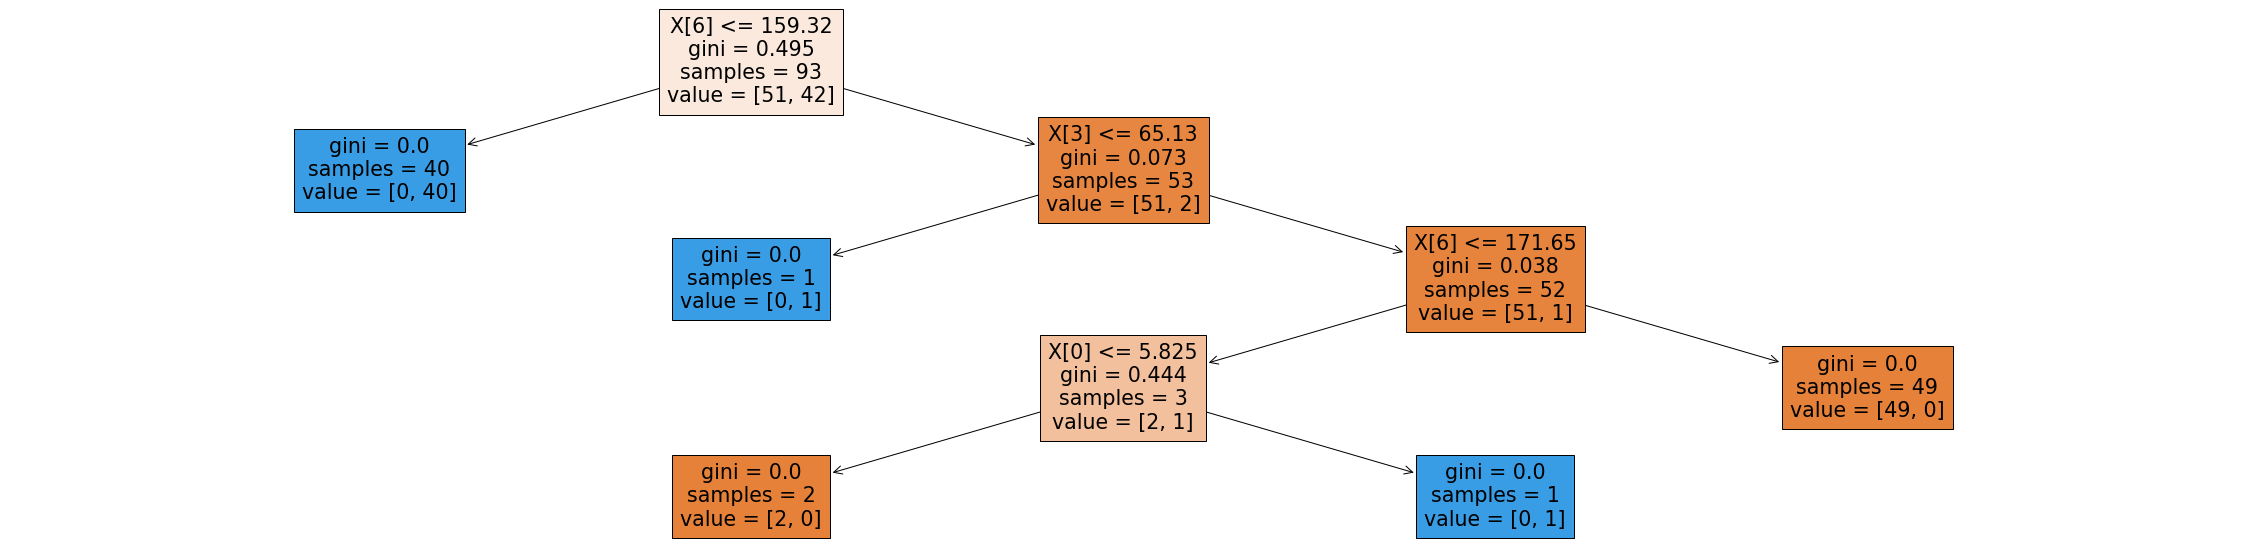

In [10]:
# Show the decision tree
model_all_params = clf
plt.figure(figsize = [40,10])
plot_tree(model_all_params,
         filled=True)
plt.show()

In [11]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9032258064516129

In [12]:
# Feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4447584995869382, 'steel_price_index'),
 (0.25211186914488787, 'interest_rate'),
 (0.06681553206130546, 'units_completed'),
 (0.06137718516778229, 'under_construction'),
 (0.05253237117223671, 'units_authorized_started'),
 (0.05014120634917156, 'lumber_price_index'),
 (0.03517304754154985, 'new_housing_permits'),
 (0.02085851632337435, 'house_supply'),
 (0.016231772652753624, 'homeownership_rate')]

In [13]:
# Sort feature importances
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

steel_price_index           0.444758
interest_rate               0.252112
units_completed             0.066816
under_construction          0.061377
units_authorized_started    0.052532
lumber_price_index          0.050141
new_housing_permits         0.035173
house_supply                0.020859
homeownership_rate          0.016232
dtype: float64

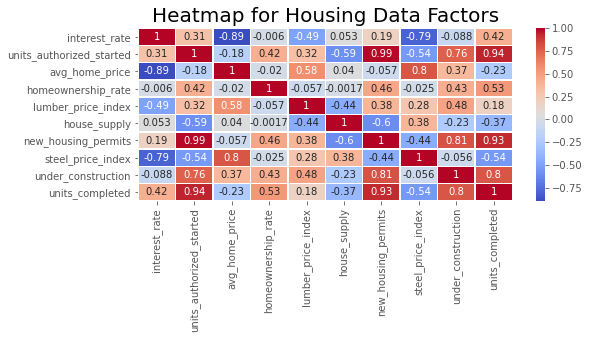

In [14]:
# Making a heat map across all variables
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
sns.heatmap(housing_data_subset.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for Housing Data Factors', fontsize = 20)
figure = plt.gcf()
figure.subplots_adjust(bottom=0.4, left=0.25)
plt.savefig('app/static/images/rf_seaborn_heatmap.png',
           dpi=200)
plt.show()

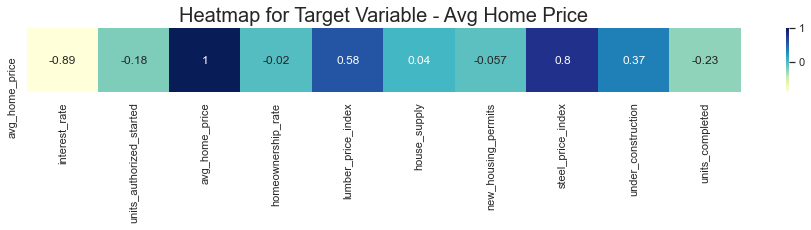

In [15]:
# Heat map - correlation with only target variables -- in this case its the AVG PRICE
sns.set(rc={'figure.figsize':(16,6)})
sns.heatmap(pd.DataFrame(pd.DataFrame(housing_data_subset.corr()).avg_home_price).T,annot=True, cmap='YlGnBu')
plt.title('Heatmap for Target Variable - Avg Home Price', fontsize = 20)
figure_2 = plt.gcf()
figure_2.subplots_adjust(top=0.75, bottom=0.6)
plt.savefig('app/static/images/rf_seaborn_heatmap_2.png',
           dpi=200)
plt.show()